In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import pandas
import src
import gensim
import os
import os.path
import csv

2015-12-12 16:37:06 bocmaxima gensim.corpora.sharded_corpus[18333] INFO Could not import Theano, will use standard float for default ShardedCorpus dtype.
2015-12-12 16:37:06 bocmaxima summa.preprocessing.cleaner[18333] INFO 'pattern' package not found; tag filters are not available for English


In [23]:
rankfiles = dict()
for dirpath, dirname, filenames in os.walk('runs'):
    for filename in filenames:
        if filename.endswith("-ranks.csv.gz"):
            _, num, _, name, version = dirpath.split('/')
            if name not in rankfiles:
                rankfiles[name] = {'changeset': {'feature_location': list(),
                                                 'triage': list()},
                                   'release': {'feature_location': list(),
                                               'triage': list()},
                                  }
                
            parts = filename.split('-')
            rankfiles[name][parts[0]][parts[1]].append((int(num), os.path.join(dirpath, filename)))

In [24]:
rankfiles

{'bookkeeper': {'changeset': {'feature_location': [(1,
     'runs/1/data/bookkeeper/v4.3.0/changeset-feature_location-lda-true-true-false-true-batch-0.002-0.5-0.002-1000-1000-500-1.0-1-file-ranks.csv.gz'),
    (10,
     'runs/10/data/bookkeeper/v4.3.0/changeset-feature_location-lda-true-true-false-true-batch-0.002-0.5-0.002-1000-1000-500-1.0-1-file-ranks.csv.gz'),
    (11,
     'runs/11/data/bookkeeper/v4.3.0/changeset-feature_location-lda-true-true-false-true-batch-0.002-0.5-0.002-1000-1000-500-1.0-1-file-ranks.csv.gz'),
    (12,
     'runs/12/data/bookkeeper/v4.3.0/changeset-feature_location-lda-true-true-false-true-batch-0.002-0.5-0.002-1000-1000-500-1.0-1-file-ranks.csv.gz'),
    (13,
     'runs/13/data/bookkeeper/v4.3.0/changeset-feature_location-lda-true-true-false-true-batch-0.002-0.5-0.002-1000-1000-500-1.0-1-file-ranks.csv.gz'),
    (14,
     'runs/14/data/bookkeeper/v4.3.0/changeset-feature_location-lda-true-true-false-true-batch-0.002-0.5-0.002-1000-1000-500-1.0-1-file-ranks

In [25]:
df = pandas.DataFrame()
for name, source in rankfiles.items():
    for source, exps in source.items():
        for exp, filenames in exps.items():
            filenames = [x for _, x in sorted(filenames)]
            mrr = list()
            for each in filenames:
                try:
                    data = pandas.read_csv(each)
                except Exception:
                    print("error reading %s" % each)
                    continue
                mrr.append(src.utils.calculate_mrr(list(data.groupby("id")["rank"].min())))
                
                if len(data[data["distance"] == 1.0]):
                    print(each)
        
            mrr = pandas.Series(mrr)       
            df = df.append(
              {'name': name, 
               'source': source,
               'experiment': exp,
               'std': mrr.std(),
               'max-min': mrr.max() - mrr.min(),
               'max': mrr.max(),
               'median': mrr.median(),
               'min': mrr.min(),
               'count': mrr.count(),
               'raw': mrr
              }, ignore_index=True)

In [26]:
df

,count,experiment,max,max-min,median,min,name,raw,source,std
0,42,feature_location,0.368762,0.095590,0.307784,0.273172,openjpa,0 0.293907 1 0.295913 2 0.294065 3...,release,0.020746
1,42,triage,0.331069,0.078906,0.293190,0.252162,openjpa,0 0.312537 1 0.271933 2 0.277477 3...,release,0.017673
2,42,feature_location,0.383814,0.084180,0.329169,0.299635,openjpa,0 0.378652 1 0.365795 2 0.320250 3...,changeset,0.020595
3,42,triage,0.396865,0.091977,0.345385,0.304888,openjpa,0 0.350950 1 0.349138 2 0.330240 3...,changeset,0.022206
4,50,feature_location,0.666961,0.049672,0.644617,0.617289,zookeeper,0 0.665236 1 0.624601 2 0.635652 3...,release,0.013105
5,50,triage,0.543743,0.059899,0.511668,0.483843,zookeeper,0 0.506386 1 0.504387 2 0.511342 3...,release,0.013244
6,50,feature_location,0.664894,0.057573,0.633545,0.607321,zookeeper,0 0.634202 1 0.632348 2 0.664894 3...,changeset,0.014654
7,50,triage,0.388732,0.062004,0.366468,0.326728,zookeeper,0 0.326728 1 0.361478 2 0.360082 3...,changeset,0.014989
8,43,feature_location,0.482366,0.069649,0.448497,0.412717,pig,0 0.457013 1 0.432943 2 0.439077 3...,release,0.015496
9,43,triage,0.619278,0.088552,0.576549,0.530726,pig,0 0.568820 1 0.561572 2 0.550892 3...,release,0.021023


In [27]:
df.where((df.experiment == 'feature_location') & (df.source == 'release')).sort_values(by=['name']).dropna()

,count,experiment,max,max-min,median,min,name,raw,source,std
20,49,feature_location,0.588497,0.092336,0.538721,0.496161,bookkeeper,0 0.519012 1 0.496161 2 0.538669 3...,release,0.019581
12,46,feature_location,0.703588,0.060145,0.671472,0.643443,mahout,0 0.654897 1 0.667096 2 0.703588 3...,release,0.012585
0,42,feature_location,0.368762,0.095590,0.307784,0.273172,openjpa,0 0.293907 1 0.295913 2 0.294065 3...,release,0.020746
8,43,feature_location,0.482366,0.069649,0.448497,0.412717,pig,0 0.457013 1 0.432943 2 0.439077 3...,release,0.015496
16,50,feature_location,0.632899,0.197898,0.527520,0.435000,tika,0 0.629664 1 0.528044 2 0.542754 3...,release,0.052961
4,50,feature_location,0.666961,0.049672,0.644617,0.617289,zookeeper,0 0.665236 1 0.624601 2 0.635652 3...,release,0.013105


In [28]:
df.where((df.experiment == 'feature_location') & (df.source == 'changeset')).sort_values(by=['name']).dropna()

,count,experiment,max,max-min,median,min,name,raw,source,std
22,49,feature_location,0.592478,0.084911,0.554346,0.507566,bookkeeper,0 0.554346 1 0.545037 2 0.565963 3...,changeset,0.018509
14,46,feature_location,0.710969,0.075233,0.668649,0.635737,mahout,0 0.651433 1 0.666059 2 0.656942 3...,changeset,0.015977
2,42,feature_location,0.383814,0.084180,0.329169,0.299635,openjpa,0 0.378652 1 0.365795 2 0.320250 3...,changeset,0.020595
10,43,feature_location,0.515807,0.083030,0.468273,0.432777,pig,0 0.454408 1 0.484315 2 0.511799 3...,changeset,0.019927
18,50,feature_location,0.605296,0.164596,0.514738,0.440700,tika,0 0.587672 1 0.480646 2 0.491845 3...,changeset,0.038565
6,50,feature_location,0.664894,0.057573,0.633545,0.607321,zookeeper,0 0.634202 1 0.632348 2 0.664894 3...,changeset,0.014654


In [29]:
df.where((df.experiment == 'triage') & (df.source == 'changeset')).sort_values(by=['name']).dropna()

,count,experiment,max,max-min,median,min,name,raw,source,std
23,49,triage,0.701626,0.068293,0.665955,0.633333,bookkeeper,0 0.641362 1 0.675102 2 0.633333 3...,changeset,0.017636
15,46,triage,0.330742,0.095856,0.284767,0.234885,mahout,0 0.274159 1 0.282789 2 0.271215 3...,changeset,0.021153
3,42,triage,0.396865,0.091977,0.345385,0.304888,openjpa,0 0.350950 1 0.349138 2 0.330240 3...,changeset,0.022206
11,43,triage,0.288236,0.153082,0.183515,0.135154,pig,0 0.188733 1 0.183515 2 0.193879 3...,changeset,0.028513
19,50,triage,0.480468,0.163620,0.402666,0.316848,tika,0 0.416654 1 0.368810 2 0.381680 3...,changeset,0.029897
7,50,triage,0.388732,0.062004,0.366468,0.326728,zookeeper,0 0.326728 1 0.361478 2 0.360082 3...,changeset,0.014989


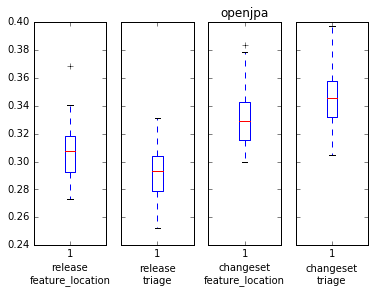

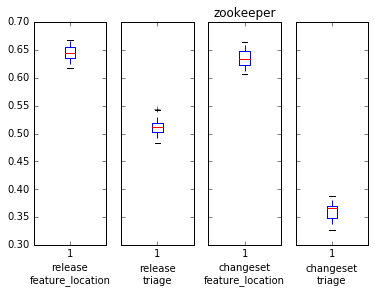

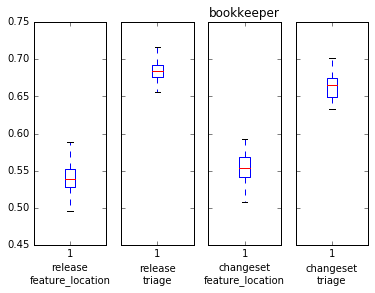

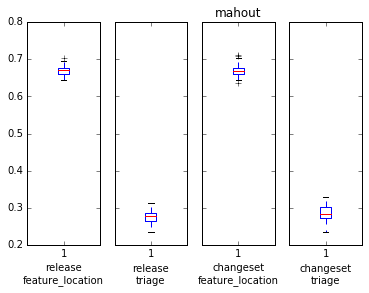

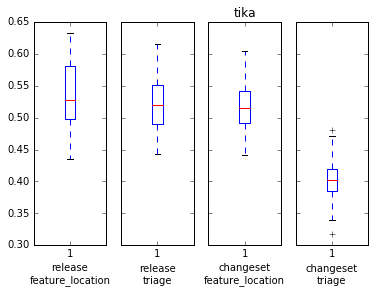

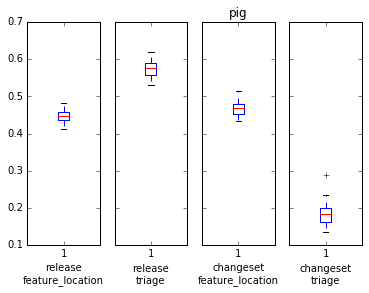

In [30]:
for plotname, indices in df.groupby(["name"]).groups.items():
    fig, axarr = plt.subplots(1, 4, sharey=True)
    axarr[2].set_title(plotname)
    for s, each in enumerate(indices):
        exp = df.ix[each]
        if (exp["min"] == 1.0):
            continue
        axarr[s].boxplot(exp.raw)
        axarr[s].set_xlabel(exp.source + "\n" + exp.experiment)
    plt.show()